In [ ]:
import torch
from transformers import AutoModelForCausalLM
from tokenizers import Tokenizer
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# ProGen2 small model initialization

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

model_name = "hugohrban/progen2-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
model.eval()

Using cpu device


config.json: 0.00B [00:00, ?B/s]

The repository hugohrban/progen2-small contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/hugohrban/progen2-small .
 You can inspect the repository content at https://hf.co/hugohrban/progen2-small.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


configuration_progen.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/hugohrban/progen2-small:
- configuration_progen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer.json: 0.00B [00:00, ?B/s]

The repository hugohrban/progen2-small contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/hugohrban/progen2-small .
 You can inspect the repository content at https://hf.co/hugohrban/progen2-small.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y
The repository hugohrban/progen2-small contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/hugohrban/progen2-small .
 You can inspect the repository content at https://hf.co/hugohrban/progen2-small.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


modeling_progen.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/hugohrban/progen2-small:
- modeling_progen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

ProGenForCausalLM(
  (transformer): ProGenModel(
    (wte): Embedding(32, 1024)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-11): 12 x ProGenBlock(
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attn): ProGenAttention(
          (attn_dropout): Dropout(p=0.0, inplace=False)
          (resid_dropout): Dropout(p=0.0, inplace=False)
          (qkv_proj): Linear(in_features=1024, out_features=3072, bias=False)
          (out_proj): Linear(in_features=1024, out_features=1024, bias=False)
        )
        (mlp): ProGenMLP(
          (fc_in): Linear(in_features=1024, out_features=4096, bias=True)
          (fc_out): Linear(in_features=4096, out_features=1024, bias=True)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.0, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1024, out_features=32, bias=True)
)

In [ ]:
crx_sequence = """
MMAYMNPGPHYSVNALALSGPSVDLMHQAVPYPSAPRKQRRERTTFTRSQLEELEALFAKTQYPDVYAREEVALKINLPESRVQVWFKNRRAKCRQQRQQQKQQQQPPGGQAKARPAKRKAGTSPRPSTDVCPDPLGISDSYSPPLPGPSGSPTTAVATVSIWSPASESPLPEAQRAGLVASGPSLTSAPYAMTYAPASAFCSSPSAYGSPSSYFSGLDPYLSPMVPQLGGPALSPLSGPSVGPSLAQSPTSLSGQSYGAYSPVDSLEFKDPTGTWKFTYNPMDPLDYKDQSAWKFQIL
""".replace('\n', '').replace(' ', '')

In [ ]:
len(crx_sequence)

299

In [ ]:
prompt_crx = "1" + crx_sequence

In [ ]:
input_ids = torch.tensor(tokenizer.encode(prompt_crx)).unsqueeze(0).to(model.device)


In [ ]:
print(len(input_ids))
print(input_ids)

1
tensor([[ 3, 16, 16,  5, 28, 16, 17, 19, 11, 19, 12, 28, 22, 25, 17,  5, 15,  5,
         15, 22, 11, 19, 22, 25,  8, 15, 16, 12, 20,  5, 25, 19, 28, 19, 22,  5,
         19, 21, 14, 20, 21, 21,  9, 21, 23, 23, 10, 23, 21, 22, 20, 15,  9,  9,
         15,  9,  5, 15, 10,  5, 14, 23, 20, 28, 19,  8, 25, 28,  5, 21,  9,  9,
         25,  5, 15, 14, 13, 17, 15, 19,  9, 22, 21, 25, 20, 25, 26, 10, 14, 17,
         21, 21,  5, 14,  7, 21, 20, 20, 21, 20, 20, 20, 14, 20, 20, 20, 20, 19,
         19, 11, 11, 20,  5, 14,  5, 21, 19,  5, 14, 21, 14,  5, 11, 23, 22, 19,
         21, 19, 22, 23,  8, 25,  7, 19,  8, 19, 15, 11, 13, 22,  8, 22, 28, 22,
         19, 19, 15, 19, 11, 19, 22, 11, 22, 19, 23, 23,  5, 25,  5, 23, 25, 22,
         13, 26, 22, 19,  5, 22,  9, 22, 19, 15, 19,  9,  5, 20, 21,  5, 11, 15,
         25,  5, 22, 11, 19, 22, 15, 23, 22,  5, 19, 28,  5, 16, 23, 28,  5, 19,
          5, 22,  5, 10,  7, 22, 22, 19, 22,  5, 28, 11, 22, 19, 22, 22, 28, 10,
         22, 11, 15,  8, 1

In [ ]:
with torch.no_grad():
  logits = model(input_ids).logits

In [ ]:
logits

tensor([[[28.6332, 28.5961, 51.7034,  ..., 40.0890, 28.5192, 28.5465],
         [38.7592, 38.7229, 42.0801,  ..., 53.8656, 38.6616, 38.6823],
         [37.0666, 37.0304, 40.4479,  ..., 52.9465, 36.9665, 36.9881],
         ...,
         [49.7380, 49.6883, 59.3702,  ..., 70.1293, 49.6019, 49.6339],
         [50.3358, 50.2879, 58.4203,  ..., 69.6003, 50.2093, 50.2379],
         [51.2247, 51.1747, 59.4221,  ..., 69.9029, 51.0918, 51.1225]]])

In [ ]:
log_probs = F.log_softmax(logits, dim = -1)

In [ ]:
log_probs[0,1]

tensor([-36.2644, -36.3007, -32.9435,  -9.4609,  -8.9517,  -2.0042, -20.6541,
         -4.7885,  -2.9401,  -2.7646,  -3.5743,  -2.9756,  -4.1656,  -3.3466,
         -2.5339,  -2.9291,  -4.5801,  -2.8419, -21.3146,  -2.9587,  -3.6888,
         -2.9373,  -1.9565,  -2.5491, -18.5002,  -3.2580,  -4.9023, -12.5992,
         -4.2407, -21.1580, -36.3621, -36.3413])

In [ ]:
# ref_log_probs = []
# tokens = []

# for i in range(len(input_ids[0]) - 1):
#   actual_token_id = input_ids[0, i + 1].item()
#   log_prob = log_probs[0, i, actual_token_id].item()
#   token = tokenizer.decode(actual_token_id)

#   ref_log_probs.append(log_prob)
#   tokens.append(token)

# print(ref_log_probs)
# print(len(ref_log_probs))
# print(tokens)

[-0.20175497233867645, -4.580125331878662, -2.70107364654541, -4.356351852416992, -4.144356727600098, -3.148232936859131, -2.9882302284240723, -2.885528326034546, -2.8187332153320312, -3.695863962173462, -3.2437970638275146, -2.3573851585388184, -3.2313101291656494, -3.17488956451416, -2.805610418319702, -2.904435396194458, -2.593379259109497, -2.907191753387451, -2.437246561050415, -2.610386848449707, -2.836515188217163, -2.102931022644043, -3.03663969039917, -3.1180856227874756, -2.4805586338043213, -4.178028106689453, -3.5581166744232178, -2.602649211883545, -2.6062183380126953, -2.771332263946533, -2.967471122741699, -3.508195400238037, -2.208132743835449, -2.140623092651367, -2.496713161468506, -2.0830399990081787, -3.4992380142211914, -4.210895538330078, -3.001431941986084, -2.3245606422424316, -1.5604439973831177, -2.9966626167297363, -1.2755203247070312, -0.7610772252082825, -0.5516368746757507, -0.013292387127876282, -0.16151684522628784, -1.6890735626220703, -1.14625072479248

In [ ]:
ref_log_probs = log_probs[0, torch.arange(input_ids.size(1)), input_ids[0]]


In [ ]:
len(log_probs[0,1:])

299

In [ ]:
# ref_log_probs=torch.Tensor(ref_log_probs)

In [ ]:
ref_log_probs_unsqueezed = ref_log_probs.unsqueeze(1)

In [ ]:
log_probs[0,1]

tensor([-36.2644, -36.3007, -32.9435,  -9.4609,  -8.9517,  -2.0042, -20.6541,
         -4.7885,  -2.9401,  -2.7646,  -3.5743,  -2.9756,  -4.1656,  -3.3466,
         -2.5339,  -2.9291,  -4.5801,  -2.8419, -21.3146,  -2.9587,  -3.6888,
         -2.9373,  -1.9565,  -2.5491, -18.5002,  -3.2580,  -4.9023, -12.5992,
         -4.2407, -21.1580, -36.3621, -36.3413])

In [ ]:
ref_log_probs[1]

tensor(-4.5801)

In [ ]:
log_probs.shape

torch.Size([1, 300, 32])

In [ ]:
llr_matrix = log_probs[0,1:] - ref_log_probs_unsqueezed[1:]

In [ ]:
llr_matrix

tensor([[-31.6843, -31.7206, -28.3634,  ..., -16.5779, -31.7819, -31.7612],
        [-29.9118, -29.9481, -26.5306,  ..., -14.0320, -30.0119, -29.9904],
        [-37.4369, -37.4822, -26.8857,  ..., -15.4768, -37.5561, -37.5299],
        ...,
        [-35.0919, -35.1416, -25.4597,  ..., -14.7006, -35.2280, -35.1960],
        [-33.3731, -33.4211, -25.2886,  ..., -14.1087, -33.4997, -33.4711],
        [-33.4689, -33.5190, -25.2715,  ..., -14.7907, -33.6018, -33.5711]])

In [ ]:
amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
aa_token_ids = [tokenizer.convert_tokens_to_ids(aa) for aa in amino_acids]


In [ ]:
aa_token_ids

[5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 28]

In [ ]:
llr_matrix_aa_only = llr_matrix[:, aa_token_ids]
print(f"\nLLR matrix (amino acids only) shape: {llr_matrix_aa_only.shape}")


LLR matrix (amino acids only) shape: torch.Size([299, 20])


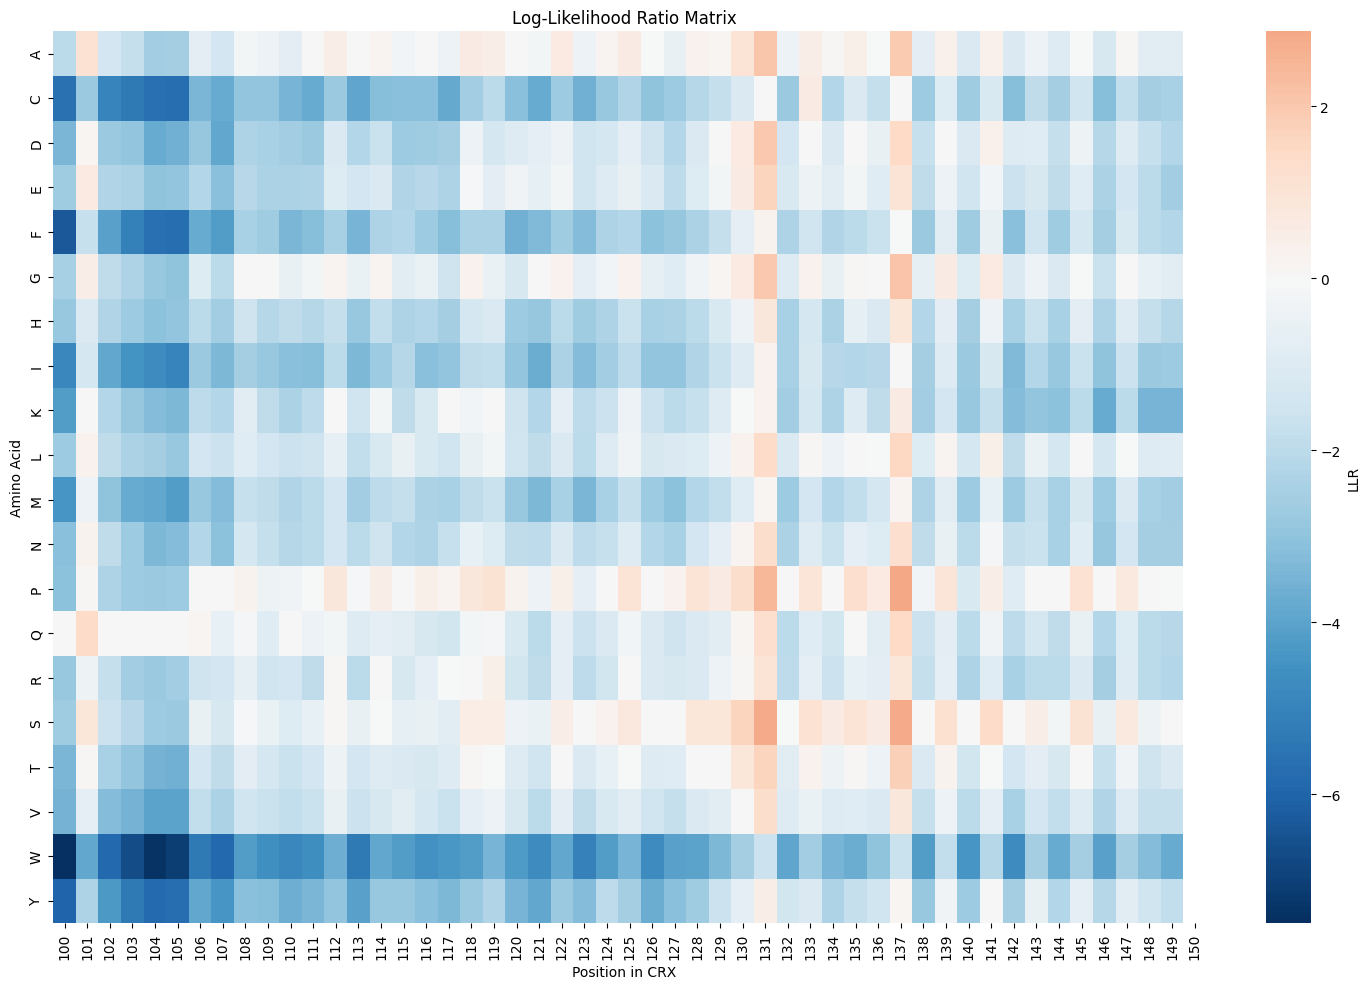

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(llr_matrix_aa_only[100:150,:].T,
            xticklabels=range(100, 151),
            yticklabels=list(amino_acids),
            cmap='RdBu_r', # change to white to dark red
            center=0,
            cbar_kws={'label': 'LLR'})
plt.xlabel('Position in CRX')
plt.ylabel('Amino Acid')
plt.title('Log-Likelihood Ratio Matrix')
plt.tight_layout()
#plt.savefig('crx_llr_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print(crx_sequence[100:150])
print(crx_sequence[131])

QKQQQQPPGGQAKARPAKRKAGTSPRPSTDVCPDPLGISDSYSPPLPGPS
C


In [ ]:
print(ref_log_probs_unsqueezed)

tensor([[-6.2998e+00],
        [-4.5801e+00],
        [-4.2288e+00],
        [-2.2482e+00],
        [-3.6050e+00],
        [-3.6774e+00],
        [-2.8356e+00],
        [-2.6714e+00],
        [-2.6214e+00],
        [-2.2045e+00],
        [-2.9178e+00],
        [-2.8900e+00],
        [-2.2177e+00],
        [-3.0083e+00],
        [-2.6222e+00],
        [-2.3426e+00],
        [-2.5151e+00],
        [-2.0878e+00],
        [-2.2736e+00],
        [-2.1794e+00],
        [-2.1864e+00],
        [-2.4331e+00],
        [-1.8647e+00],
        [-2.9004e+00],
        [-2.8260e+00],
        [-2.4888e+00],
        [-3.7149e+00],
        [-2.8631e+00],
        [-1.9552e+00],
        [-2.2456e+00],
        [-3.0014e+00],
        [-2.1980e+00],
        [-3.1422e+00],
        [-2.1477e+00],
        [-2.1598e+00],
        [-2.1168e+00],
        [-1.9486e+00],
        [-2.9775e+00],
        [-2.3300e+00],
        [-2.4801e+00],
        [-1.5604e+00],
        [-1.7065e+00],
        [-3.1559e+00],
        [-2

In [ ]:
# progen2 vs esm2 crx
ref_progen2 = torch.Tensor([[-6.2998e+00],
        [-4.5801e+00],
        [-4.2288e+00],
        [-2.2482e+00],
        [-3.6050e+00],
        [-3.6774e+00],
        [-2.8356e+00],
        [-2.6714e+00],
        [-2.6214e+00],
        [-2.2045e+00],
        [-2.9178e+00],
        [-2.8900e+00],
        [-2.2177e+00],
        [-3.0083e+00],
        [-2.6222e+00],
        [-2.3426e+00],
        [-2.5151e+00],
        [-2.0878e+00],
        [-2.2736e+00],
        [-2.1794e+00],
        [-2.1864e+00],
        [-2.4331e+00],
        [-1.8647e+00],
        [-2.9004e+00],
        [-2.8260e+00],
        [-2.4888e+00],
        [-3.7149e+00],
        [-2.8631e+00],
        [-1.9552e+00],
        [-2.2456e+00],
        [-3.0014e+00],
        [-2.1980e+00],
        [-3.1422e+00],
        [-2.1477e+00],
        [-2.1598e+00],
        [-2.1168e+00],
        [-1.9486e+00],
        [-2.9775e+00],
        [-2.3300e+00],
        [-2.4801e+00],
        [-1.5604e+00],
        [-1.7065e+00],
        [-3.1559e+00],
        [-2.3137e+00],
        [-5.5164e-01],
        [-7.6912e+00],
        [-8.5823e+00],
        [-6.7974e+00],
        [-4.5943e+00],
        [-7.0270e+00],
        [-1.0762e+01],
        [-5.3348e+00],
        [-4.0696e+00],
        [-1.1060e+01],
        [-7.7636e+00],
        [-4.3058e+00],
        [-1.7876e+00],
        [-5.8927e+00],
        [-6.9667e+00],
        [-3.3756e+00],
        [-6.2191e+00],
        [-5.7818e+00],
        [-8.5040e+00],
        [-9.2420e+00],
        [-9.5338e+00],
        [-4.4505e+00],
        [-5.3008e+00],
        [-8.7336e+00],
        [-8.5409e+00],
        [-8.5462e+00],
        [-1.5697e-01],
        [-1.3027e+01],
        [-7.0389e+00],
        [-4.0752e+00],
        [-5.5907e+00],
        [-1.0313e+01],
        [-9.5882e+00],
        [-1.0965e+01],
        [-4.1171e+00],
        [-1.0398e+01],
        [-8.2098e+00],
        [-7.1168e+00],
        [-1.1918e+01],
        [-9.9143e+00],
        [-7.9774e+00],
        [-5.7199e+00],
        [-1.0900e+01],
        [-1.0504e+01],
        [-8.5080e+00],
        [-1.0030e+01],
        [-1.0034e-03],
        [-1.1454e+01],
        [-7.5544e+00],
        [-5.8786e+00],
        [-5.2652e+00],
        [-4.1281e+00],
        [-5.3478e-02],
        [-1.2352e+00],
        [-1.6058e+00],
        [-1.4059e+00],
        [-1.2036e+00],
        [-5.6693e-01],
        [-3.1366e+00],
        [-1.0231e+00],
        [-7.3386e-01],
        [-5.1998e-01],
        [-5.1188e-01],
        [-1.6342e+00],
        [-1.2029e+00],
        [-2.0808e+00],
        [-1.6592e+00],
        [-1.5383e+00],
        [-1.7152e+00],
        [-2.5198e+00],
        [-1.6366e+00],
        [-2.2586e+00],
        [-1.7548e+00],
        [-1.8481e+00],
        [-1.8219e+00],
        [-2.7048e+00],
        [-2.6888e+00],
        [-1.8577e+00],
        [-1.6671e+00],
        [-2.4918e+00],
        [-1.5027e+00],
        [-2.0401e+00],
        [-2.6936e+00],
        [-1.8255e+00],
        [-1.7300e+00],
        [-2.4207e+00],
        [-2.6122e+00],
        [-3.3795e+00],
        [-4.5018e+00],
        [-1.7596e+00],
        [-2.9129e+00],
        [-2.1264e+00],
        [-2.8391e+00],
        [-2.4301e+00],
        [-4.4911e+00],
        [-1.6018e+00],
        [-2.9230e+00],
        [-1.3933e+00],
        [-3.0001e+00],
        [-1.3716e+00],
        [-2.0838e+00],
        [-1.4981e+00],
        [-2.6933e+00],
        [-1.2623e+00],
        [-2.4797e+00],
        [-1.5832e+00],
        [-1.5682e+00],
        [-2.4145e+00],
        [-1.6516e+00],
        [-2.1546e+00],
        [-2.7824e+00],
        [-2.3274e+00],
        [-1.7692e+00],
        [-3.1853e+00],
        [-1.2992e+00],
        [-1.9310e+00],
        [-2.8509e+00],
        [-1.4900e+00],
        [-4.1443e+00],
        [-6.0235e+00],
        [-1.8069e+00],
        [-1.8471e+00],
        [-2.0281e+00],
        [-1.6345e+00],
        [-2.8747e+00],
        [-1.6806e+00],
        [-2.1270e+00],
        [-2.5708e+00],
        [-1.7548e+00],
        [-2.9171e+00],
        [-2.0404e+00],
        [-2.8786e+00],
        [-2.7677e+00],
        [-1.7321e+00],
        [-2.2023e+00],
        [-2.1107e+00],
        [-3.3189e+00],
        [-1.7717e+00],
        [-1.9890e+00],
        [-2.2384e+00],
        [-2.1987e+00],
        [-1.6949e+00],
        [-2.3602e+00],
        [-2.7063e+00],
        [-1.6942e+00],
        [-1.9217e+00],
        [-1.9277e+00],
        [-3.2394e+00],
        [-1.9739e+00],
        [-3.7453e+00],
        [-2.3839e+00],
        [-3.3828e+00],
        [-1.9409e+00],
        [-1.7403e+00],
        [-1.8086e+00],
        [-1.9267e+00],
        [-1.7878e+00],
        [-3.8156e+00],
        [-4.3251e+00],
        [-1.6994e+00],
        [-1.7381e+00],
        [-2.1735e+00],
        [-1.6280e+00],
        [-1.8237e+00],
        [-2.7306e+00],
        [-2.3792e+00],
        [-1.7577e+00],
        [-2.2069e+00],
        [-1.7588e+00],
        [-1.6650e+00],
        [-2.7086e+00],
        [-4.2687e+00],
        [-1.4655e+00],
        [-2.3237e+00],
        [-3.1412e+00],
        [-3.5567e+00],
        [-2.8062e+00],
        [-2.7970e+00],
        [-2.8053e+00],
        [-1.6761e+00],
        [-2.1697e+00],
        [-3.6047e+00],
        [-3.6006e+00],
        [-1.7768e+00],
        [-2.5059e+00],
        [-2.8462e+00],
        [-2.2052e+00],
        [-1.9428e+00],
        [-2.0948e+00],
        [-1.7363e+00],
        [-2.7365e+00],
        [-1.8943e+00],
        [-2.0406e+00],
        [-2.4308e+00],
        [-1.7777e+00],
        [-2.2555e+00],
        [-2.2310e+00],
        [-1.6734e+00],
        [-3.2483e+00],
        [-1.9543e+00],
        [-2.1763e+00],
        [-1.8109e+00],
        [-2.3059e+00],
        [-1.8586e+00],
        [-2.5684e+00],
        [-2.1060e+00],
        [-2.4945e+00],
        [-2.8871e+00],
        [-1.8371e+00],
        [-2.4022e+00],
        [-1.6564e+00],
        [-2.3490e+00],
        [-2.6760e+00],
        [-1.9073e+00],
        [-2.8095e+00],
        [-2.3677e+00],
        [-1.9991e+00],
        [-3.2322e+00],
        [-1.6834e+00],
        [-2.1115e+00],
        [-3.3668e+00],
        [-3.8424e+00],
        [-1.8172e+00],
        [-2.5057e+00],
        [-3.2136e+00],
        [-4.1138e+00],
        [-3.3215e+00],
        [-3.3530e+00],
        [-2.8869e+00],
        [-2.9179e+00],
        [-2.2675e+00],
        [-2.8658e+00],
        [-4.7155e+00],
        [-3.1631e+00],
        [-3.8100e+00],
        [-3.2787e+00],
        [-3.7285e+00],
        [-2.9462e+00],
        [-2.6326e+00],
        [-3.2768e+00],
        [-3.1668e+00],
        [-3.1182e+00],
        [-2.4905e+00],
        [-3.5392e+00],
        [-3.3810e+00],
        [-4.0688e+00],
        [-5.8879e+00],
        [-3.1323e+00],
        [-2.4271e+00],
        [-2.0079e+00],
        [-4.7609e+00],
        [-2.9392e+00],
        [-3.5575e+00],
        [-2.7910e+00],
        [-4.0812e+00],
        [-3.0869e+00]])

ref_esm2 = torch.Tensor([[ 0.0000e+00],
        [-6.1820e-03],
        [-6.1626e-01],
        [-2.8478e-01],
        [-4.9924e-01],
        [-6.9610e-01],
        [-7.9018e-01],
        [-1.7794e-01],
        [-4.8641e-01],
        [-3.4257e-01],
        [-9.7779e-01],
        [-6.3414e-01],
        [-2.4741e-01],
        [-6.7637e-01],
        [-8.4276e-01],
        [-4.2372e-01],
        [-3.7287e-01],
        [-2.6504e-01],
        [-3.0477e-01],
        [-2.7124e-01],
        [-2.8904e-01],
        [-1.7627e-01],
        [-2.2910e-01],
        [-6.0265e-01],
        [-7.9380e-01],
        [-2.7878e-01],
        [-1.0323e+00],
        [-7.9990e-01],
        [-4.5580e-01],
        [-2.4751e-01],
        [-6.1526e-01],
        [-2.2825e-01],
        [-1.6022e+00],
        [-2.1507e-01],
        [-2.3624e-01],
        [-2.3301e-01],
        [-9.9457e-02],
        [-1.1600e-01],
        [-8.2869e-02],
        [-1.2551e-01],
        [-1.1254e-02],
        [-4.3796e-03],
        [-4.9895e-01],
        [-1.5436e-04],
        [-4.6826e-04],
        [-6.6029e-02],
        [-1.0770e-02],
        [-3.2140e-02],
        [-2.7119e-01],
        [-2.7300e-01],
        [-1.5867e-03],
        [-2.7285e-02],
        [-4.9606e-02],
        [-1.8887e-01],
        [-4.0237e-04],
        [-3.9045e-03],
        [-2.0255e-01],
        [-3.3155e-02],
        [-1.0226e-02],
        [-1.3194e-01],
        [-1.5158e-01],
        [-3.6186e-01],
        [-1.8408e-01],
        [-3.7743e-02],
        [-8.5368e-03],
        [-6.7023e-03],
        [-2.1577e-01],
        [-1.7684e-01],
        [-6.1317e-01],
        [-1.7094e-03],
        [-1.3890e-02],
        [-5.8016e-02],
        [-2.0037e-01],
        [-1.3699e-02],
        [-7.3228e-01],
        [-1.3665e-01],
        [-1.0143e-01],
        [-2.1204e-01],
        [-2.0813e-01],
        [-4.9826e-02],
        [-2.1292e-03],
        [-7.1614e-02],
        [-1.6540e-02],
        [-1.8901e-02],
        [-1.3704e-03],
        [-1.6061e-02],
        [-3.8385e-05],
        [-3.0716e-04],
        [-1.8846e-02],
        [-2.5968e-03],
        [-9.5131e-04],
        [-2.6437e-04],
        [-4.9835e-02],
        [-5.4914e-02],
        [-3.3707e+00],
        [-6.3673e-02],
        [-2.4151e-01],
        [-2.4551e-02],
        [-6.6241e-01],
        [-6.8109e-02],
        [-1.7672e-02],
        [-2.1433e-02],
        [-1.9996e+00],
        [-1.5371e-02],
        [-1.5300e-02],
        [-1.6234e-02],
        [-4.1705e-02],
        [-4.2381e-01],
        [-2.9855e-01],
        [-3.4012e-01],
        [-2.0657e-01],
        [-5.2436e-01],
        [-2.5398e-01],
        [-4.9296e-01],
        [-2.4650e-01],
        [-4.1362e-01],
        [-1.4107e-01],
        [-2.2422e-01],
        [-1.5503e-01],
        [-1.2754e-01],
        [-2.2127e-01],
        [-1.1735e-01],
        [-4.7567e-01],
        [-5.6925e-01],
        [-1.4171e-01],
        [-1.2624e-01],
        [-5.2941e-01],
        [-1.4146e-01],
        [-2.3746e-01],
        [-5.9464e-01],
        [-9.1444e-01],
        [-6.1005e-01],
        [-4.6591e+00],
        [-2.4335e-01],
        [-5.7344e-01],
        [-2.3052e-01],
        [-2.4867e-01],
        [-2.4622e-01],
        [-1.4675e+00],
        [-2.3844e-01],
        [-6.7123e-01],
        [-2.1329e-01],
        [-7.4867e-01],
        [-6.7112e-02],
        [-1.3606e-01],
        [-4.1738e-01],
        [-2.9336e-01],
        [-1.9412e-01],
        [-3.1454e-01],
        [-1.5948e-01],
        [-2.0024e-01],
        [-7.3214e-01],
        [-1.3452e-01],
        [-1.2352e-01],
        [-4.1051e-01],
        [-3.6703e-01],
        [-2.1402e-01],
        [-6.2803e-01],
        [-2.3065e-01],
        [-4.5161e-01],
        [-9.3114e-01],
        [-1.4592e-01],
        [-2.0361e+00],
        [-2.6414e+00],
        [-8.3098e-02],
        [-7.4906e-02],
        [-2.5163e-01],
        [-1.9857e-01],
        [-1.6434e+00],
        [-1.3707e-01],
        [-1.3451e-01],
        [-3.1273e-01],
        [-2.3590e-01],
        [-6.6546e-01],
        [-2.1439e-01],
        [-7.9943e-01],
        [-1.0851e+00],
        [-2.1603e-01],
        [-2.3410e-01],
        [-2.6925e-01],
        [-5.5269e-01],
        [-2.1534e-01],
        [-1.7045e-01],
        [-5.0549e-01],
        [-1.0621e-01],
        [-1.4952e-01],
        [-2.4200e-01],
        [-3.6444e-01],
        [-1.0547e-01],
        [-2.7730e-01],
        [-1.1850e-01],
        [-5.6873e-01],
        [-1.9967e-01],
        [-1.6328e+00],
        [-3.2997e-01],
        [-4.5951e-01],
        [-2.0361e-01],
        [-7.7589e-02],
        [-1.9706e-01],
        [-8.7484e-02],
        [-1.6008e-01],
        [-5.6241e-01],
        [-1.3164e+00],
        [-1.5291e-01],
        [-1.2765e-01],
        [-7.3084e-02],
        [-1.2277e-01],
        [-1.9314e-01],
        [-2.0765e-01],
        [-3.6868e-01],
        [-7.8910e-02],
        [-7.5156e-02],
        [-1.1298e-01],
        [-8.2637e-02],
        [-4.2537e-01],
        [-9.5912e-01],
        [-7.2737e-02],
        [-2.4666e-01],
        [-2.6797e-01],
        [-5.4378e-01],
        [-6.3749e-02],
        [-4.8215e-01],
        [-5.1990e-01],
        [-7.5172e-02],
        [-5.6028e-02],
        [-9.7321e-01],
        [-1.0631e+00],
        [-1.8757e-01],
        [-9.0825e-01],
        [-2.2717e-01],
        [-2.3683e-01],
        [-1.8303e-01],
        [-9.4435e-02],
        [-2.2012e-01],
        [-1.6872e-01],
        [-4.4791e-02],
        [-4.1915e-02],
        [-1.3377e-01],
        [-1.2243e-01],
        [-2.1040e-01],
        [-1.0938e-01],
        [-1.0644e-01],
        [-8.2608e-01],
        [-3.1874e-01],
        [-9.8511e-02],
        [-1.1965e-01],
        [-1.7735e-01],
        [-1.8036e-01],
        [-9.2643e-01],
        [-4.2309e-02],
        [-4.2428e-02],
        [-5.1724e-01],
        [-1.0992e-01],
        [-1.2808e-01],
        [-1.5668e-01],
        [-3.5605e-01],
        [-1.0313e+00],
        [-1.0350e-01],
        [-6.4906e-01],
        [-2.1770e-01],
        [-2.0088e-01],
        [-2.1347e-01],
        [-3.6241e-02],
        [-2.1967e-02],
        [-3.4012e-01],
        [-5.2006e-02],
        [-2.4593e-01],
        [-6.3300e-02],
        [-4.3154e-01],
        [-2.9579e-01],
        [-8.4707e-02],
        [-1.8770e-02],
        [-1.2658e-01],
        [-2.2170e-01],
        [-5.3205e-01],
        [-4.2620e-01],
        [-8.3368e-01],
        [-6.2883e-01],
        [-9.6184e-01],
        [-3.6779e-01],
        [-1.0802e-01],
        [-4.8807e-01],
        [-7.3713e-02],
        [-4.6340e-01],
        [-3.2482e-02],
        [-2.7015e-01],
        [-4.6138e-02],
        [-8.3984e-02],
        [-3.1164e-01],
        [-2.1823e-02],
        [-1.2755e-02],
        [-7.9373e-01],
        [-1.4504e-01],
        [-2.2282e-01],
        [-3.5707e-01],
        [-4.3756e-02],
        [-2.0418e-01],
        [-3.6220e-01],
        [-1.0389e+00],
        [-9.6645e-02],
        [ 0.0000e+00]])

In [ ]:
print(len(ref_esm2[1:300]))
print(len(ref_progen2[1:]))
llr_matrix_esm2_vs_progen2 = ref_esm2[1:300] - ref_progen2[1:]

299
299


In [ ]:
ref_esm2_clean = ref_esm2[1:300]
ref_progen2_clean = ref_progen2[1:]

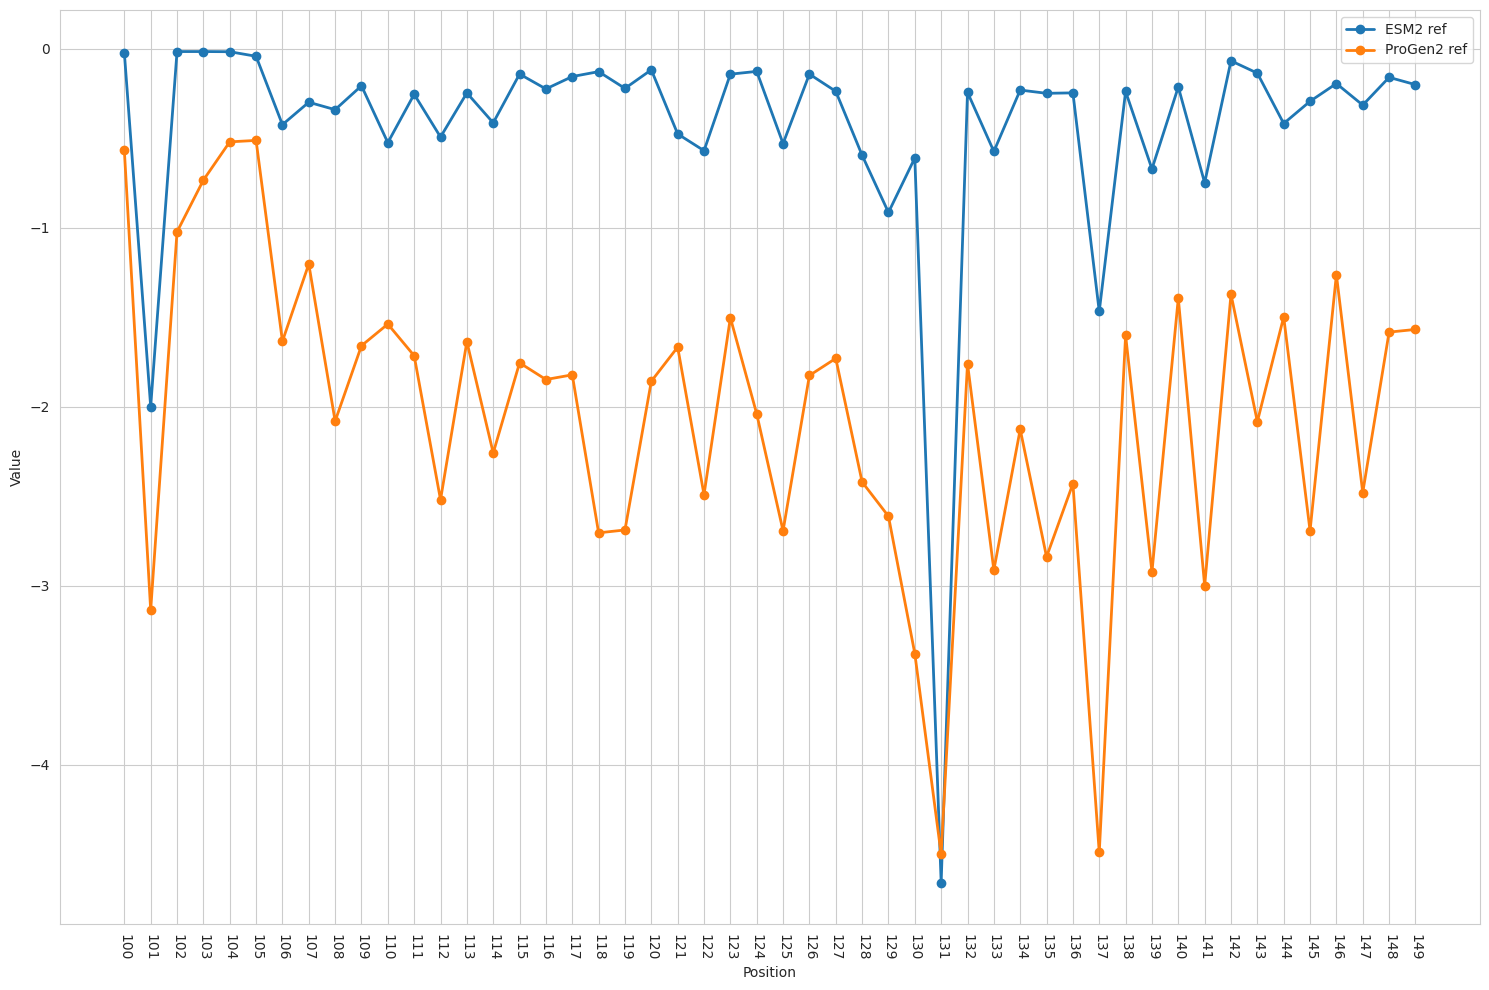

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

plt.plot(ref_esm2_clean[100:150], label="ESM2 ref", linewidth=2, marker='o')
plt.plot(ref_progen2_clean[100:150], label="ProGen2 ref", linewidth=2, marker='o')

ax = plt.gca()
ax.set_xticks(range(0, 50, 1))  # Tick every 5 positions
ax.set_xticklabels(range(100, 150, 1),rotation=-90)

plt.xlabel('Position')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
diff = ref_esm2_clean - ref_progen2_clean

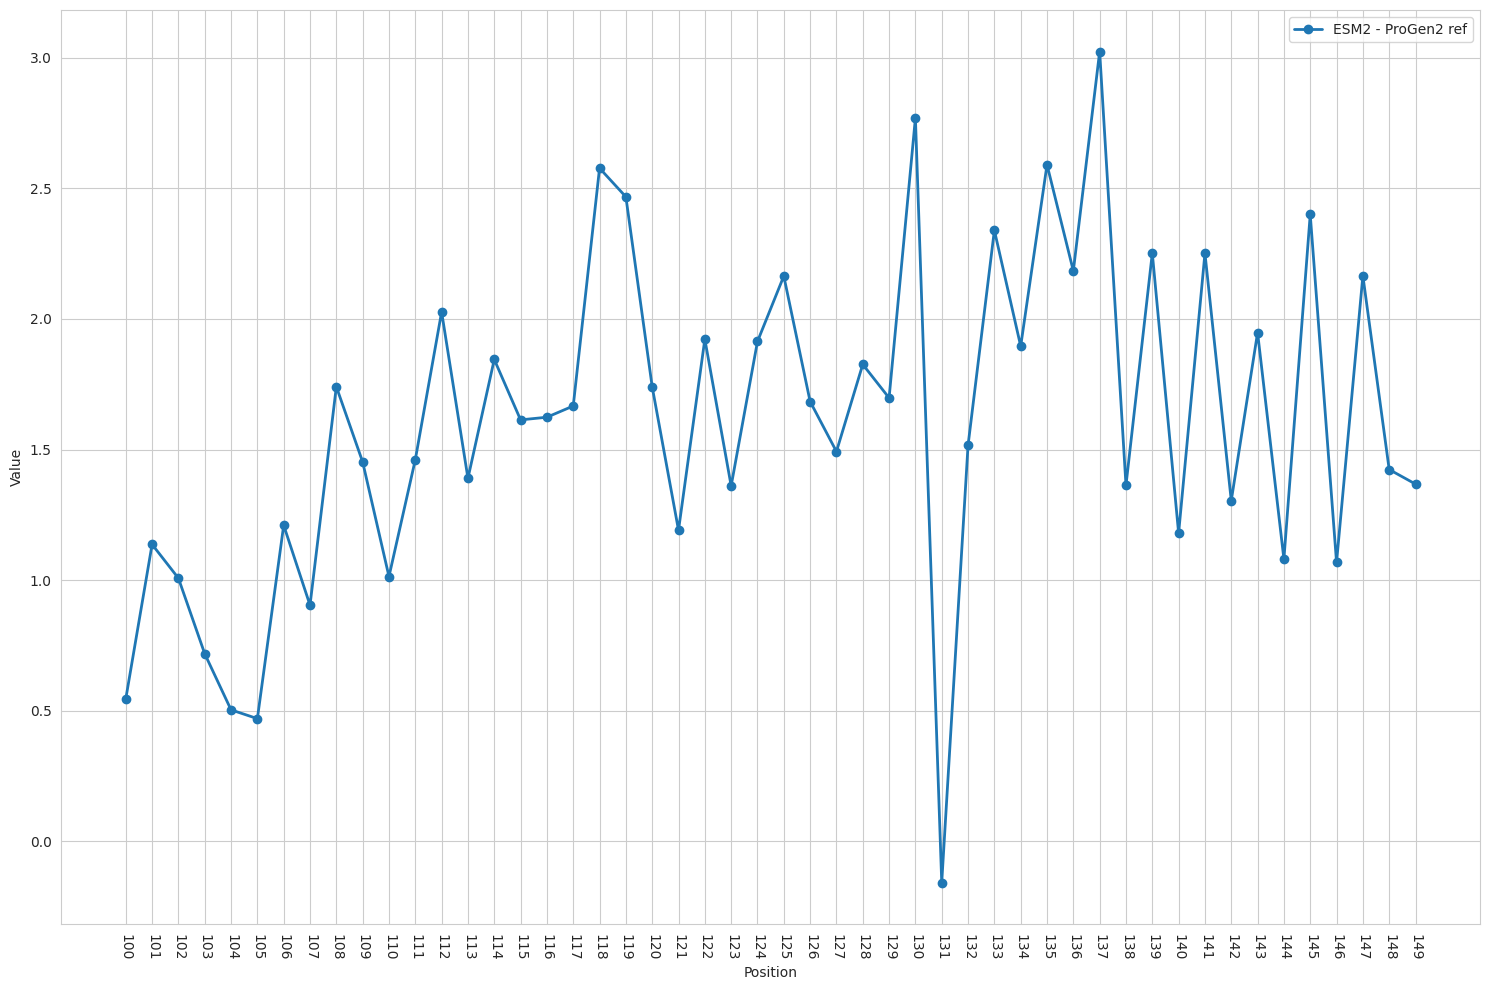

In [ ]:


sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

plt.plot(diff[100:150], label="ESM2 - ProGen2 ref", linewidth=2, marker='o')
#plt.plot(ref_progen2_clean[100:150], label="ProGen2 ref", linewidth=2, marker='o')

ax = plt.gca()
ax.set_xticks(range(0, 50, 1))  # Tick every 5 positions
ax.set_xticklabels(range(100, 150, 1),rotation=-90)

plt.xlabel('Position')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pickle

In [ ]:
with open('log_probs.pkl', 'rb') as f:
    log_probs_loaded = pickle.load(f)

In [ ]:
log_probs_esm2 = log_probs_loaded[1:-1]

In [ ]:
log_probs_progen2 = log_probs[0,1:]

In [ ]:
print(len(log_probs_progen2))

299


In [ ]:
print(len(log_probs_esm2))

299


In [ ]:
len(log_probs_esm2[0])

33

In [ ]:
log_probs_esm2_clean = log_probs_esm2[:, aa_token_ids]
log_probs_progen2_clean = log_probs_progen2[:, aa_token_ids]

In [ ]:
diff_log_probs = log_probs_esm2_clean - log_probs_progen2_clean

In [ ]:
# define the difference in log_probs esm and progen2 at 131

diff_log_probs_131 = diff_log_probs[131]

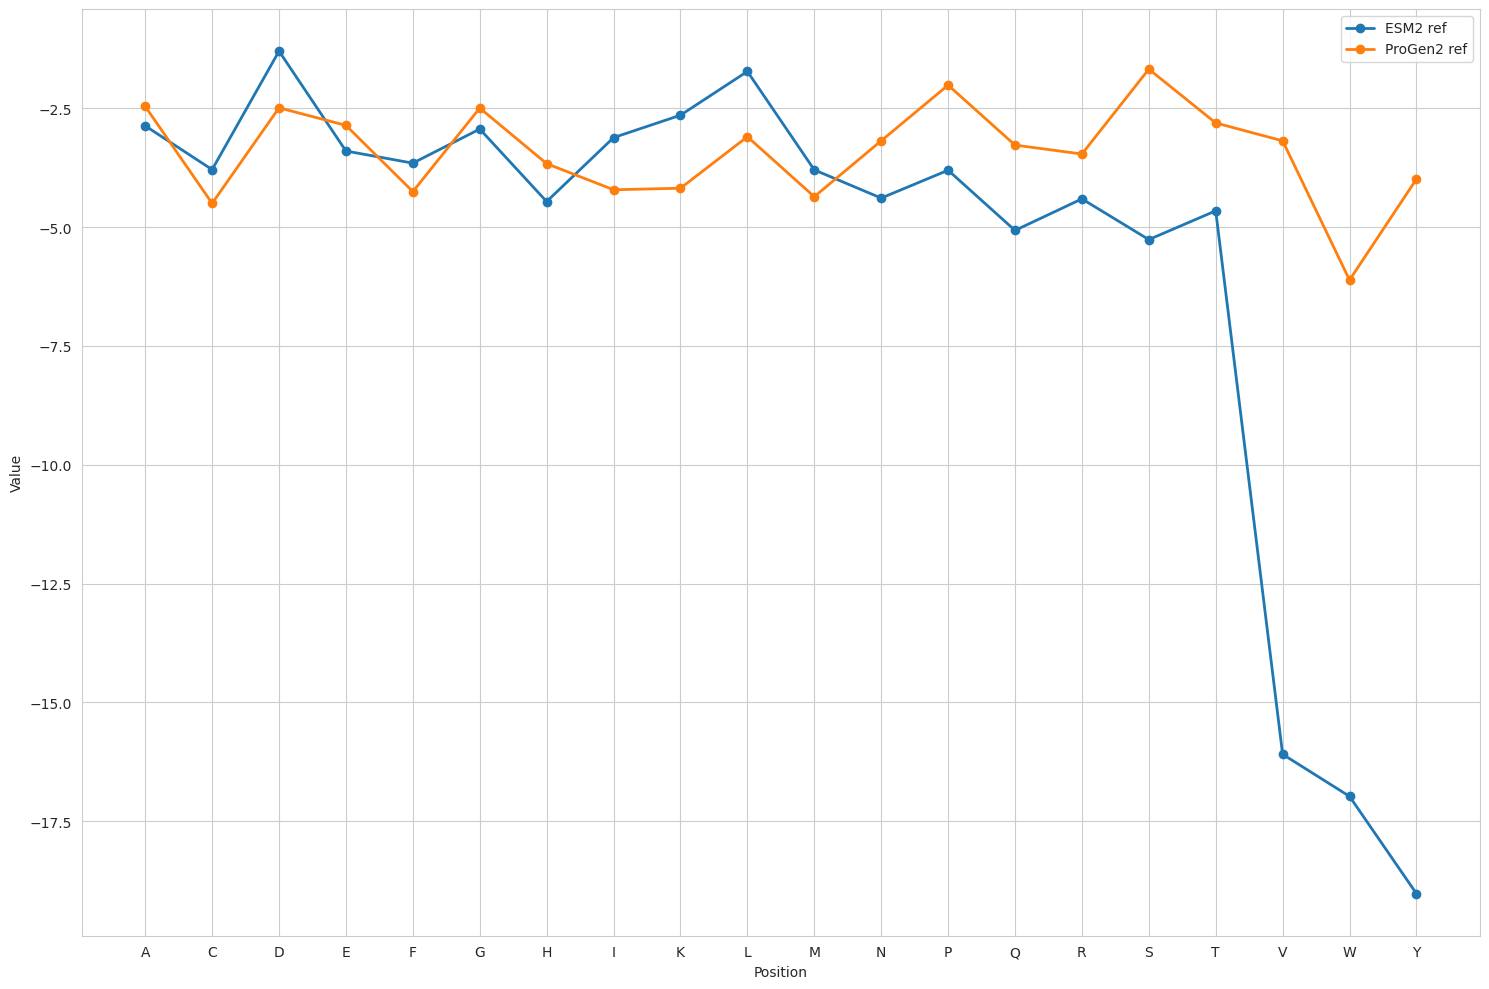

In [ ]:
# !!!make sure this matches vocab!!!

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

plt.plot(log_probs_esm2_clean[131], label="ESM2 ref", linewidth=2, marker='o')
plt.plot(log_probs_progen2_clean[131], label="ProGen2 ref", linewidth=2, marker='o')

ax = plt.gca()
ax.set_xticks(range(0, 20, 1))
ax.set_xticklabels(list(amino_acids))

plt.xlabel('Position')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

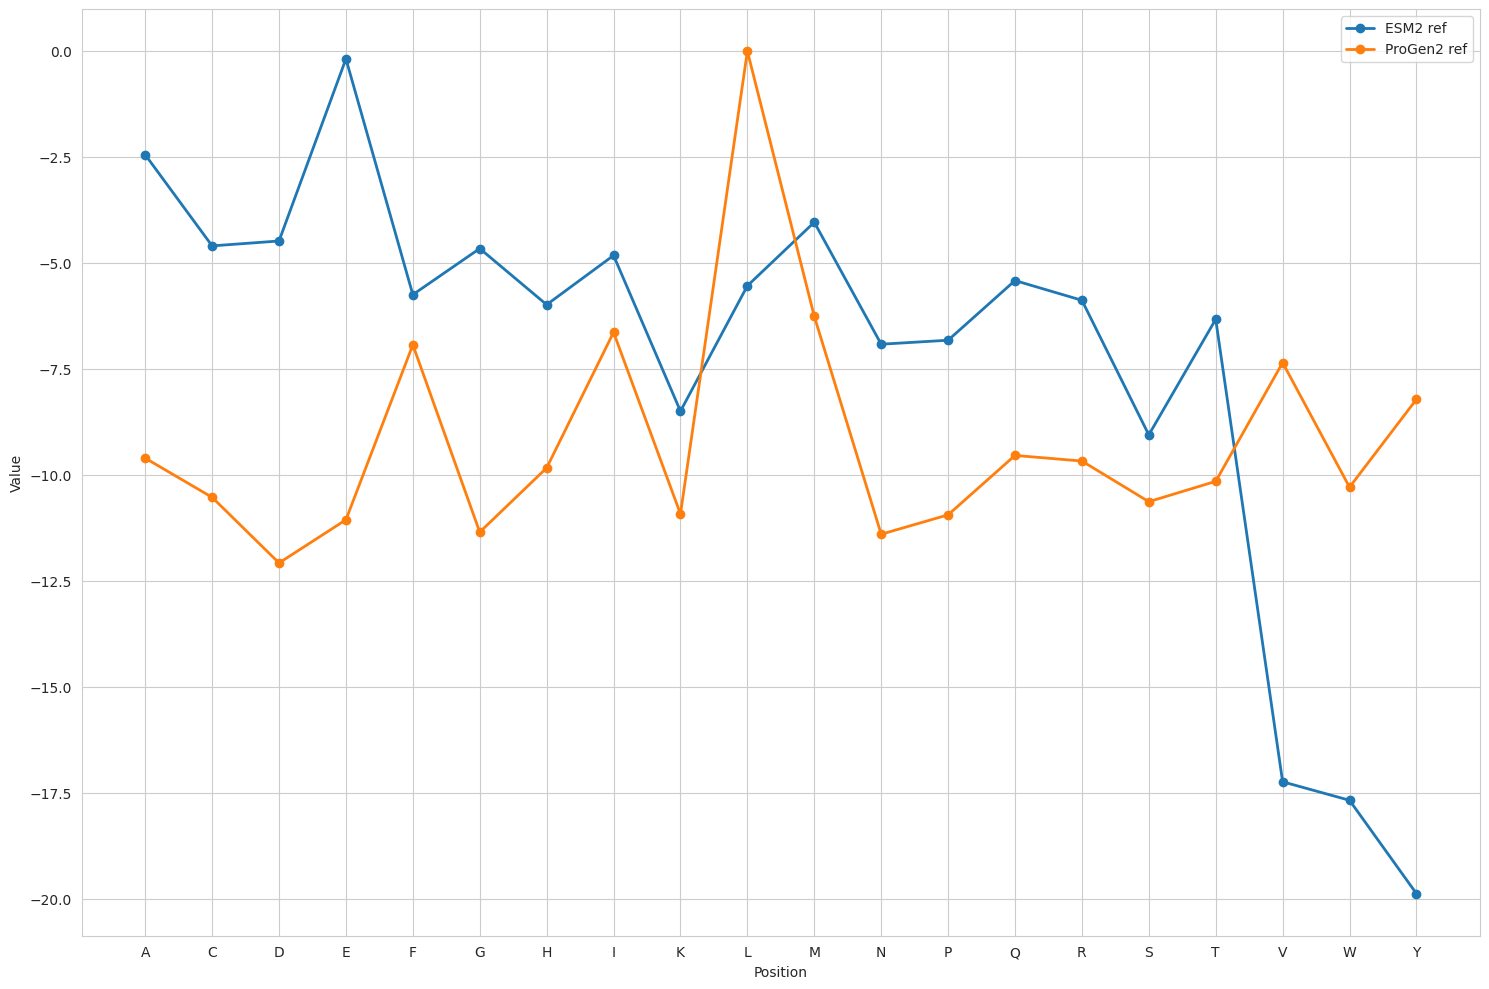

In [ ]:
# !!!make sure this matches vocab!!!

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

plt.plot(log_probs_esm2_clean[52], label="ESM2 ref", linewidth=2, marker='o')
plt.plot(log_probs_progen2_clean[52], label="ProGen2 ref", linewidth=2, marker='o')

ax = plt.gca()
ax.set_xticks(range(0, 20, 1))
ax.set_xticklabels(list(amino_acids))

plt.xlabel('Position')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
crx_sequence[52]

'E'

In [ ]:
vocab = tokenizer.get_vocab()

In [ ]:
vocab

{'Z': 29,
 '<|bos|>': 1,
 'X': 27,
 'R': 21,
 'H': 12,
 'Y': 28,
 'P': 19,
 '<|eos|>': 2,
 'A': 5,
 'B': 6,
 '<|endoftext|>': 30,
 '<|pad|>': 0,
 'O': 18,
 'D': 8,
 'N': 17,
 'Q': 20,
 'T': 23,
 'I': 13,
 'L': 15,
 'S': 22,
 '2': 4,
 'G': 11,
 'M': 16,
 'E': 9,
 '1': 3,
 'U': 24,
 'W': 26,
 'C': 7,
 'K': 14,
 'F': 10,
 'V': 25}

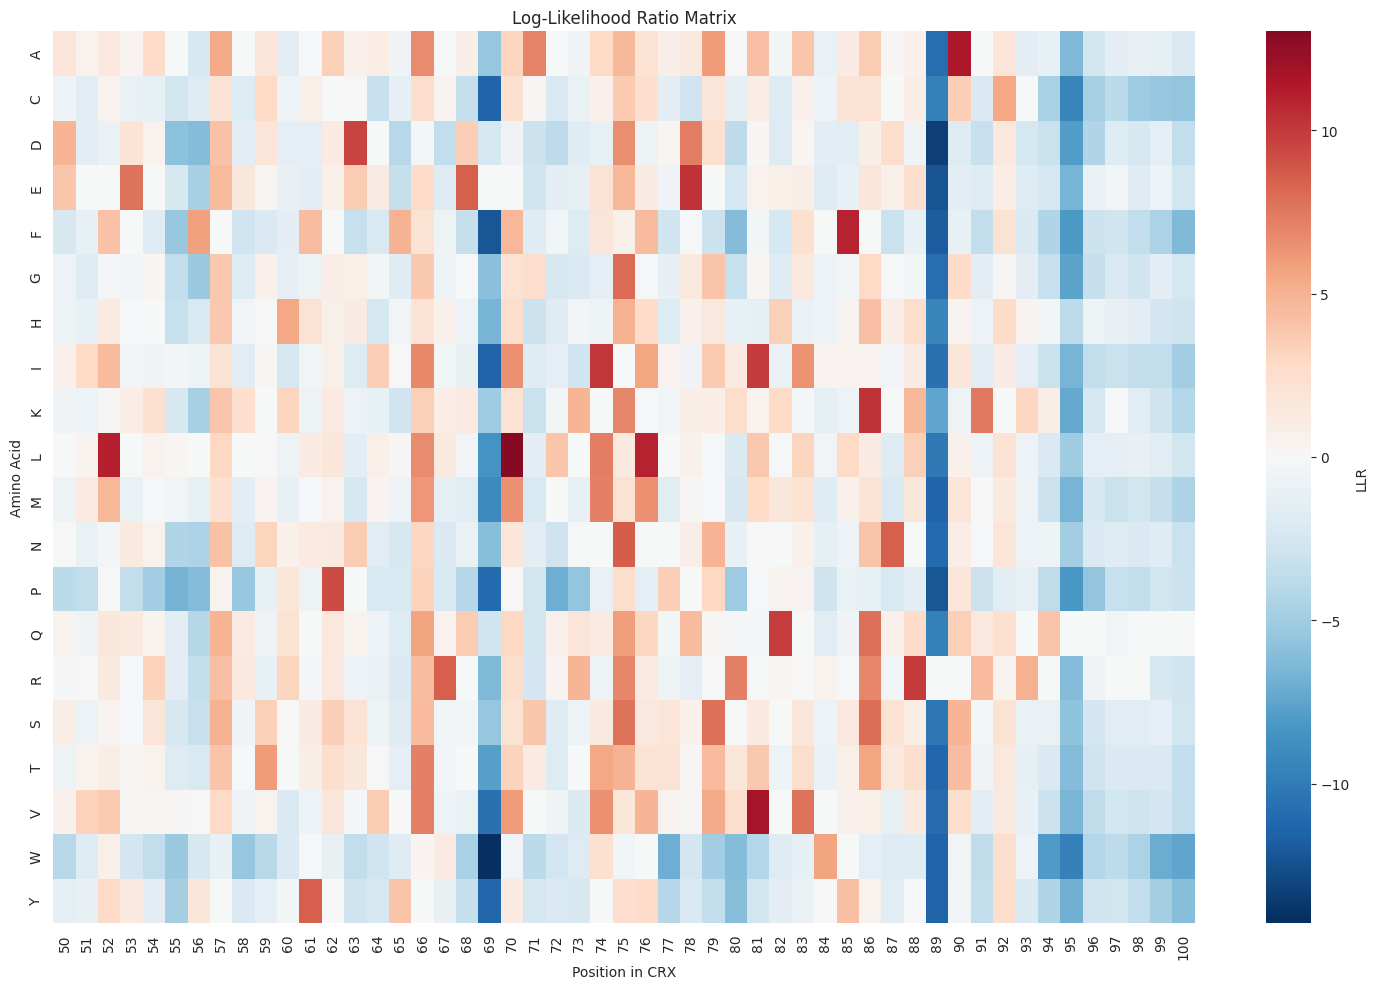

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(llr_matrix_aa_only[50:101].T,
            xticklabels=range(50,101),
            yticklabels=list(amino_acids),
            cmap='RdBu_r', # change to white to dark red
            center=0,
            cbar_kws={'label': 'LLR'})
plt.xlabel('Position in CRX')
plt.ylabel('Amino Acid')
plt.title('Log-Likelihood Ratio Matrix')
plt.tight_layout()
plt.show()

In [ ]:
crx_sequence[52]

'E'